# Prédiction Prophet

## Imports et lecture des données

### Imports

In [ ]:
import matplotlib.pyplot as plt
import mplfinance as mpl
import pandas as pd
import statsmodels.api as sm
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from src.utils import init_notebook

In [ ]:
init_notebook()

### Lecture des données

In [ ]:
data_folder = "data/raw_data"

In [ ]:
stock_name = "AAPL"

In [ ]:
df = pd.read_csv(
    f"{data_folder}/{stock_name}.csv", parse_dates=["Date"], index_col="Date"
)

df.shape = (756, 6)


In [ ]:
train_start_date = "2019"
train_end_date = "2021-10-01"
df_train = df.loc[train_start_date:train_end_date]

### Pré-traitement pour Prophet

In [ ]:
x = df_train[[]].copy()

In [ ]:
x["ds"] = df_train.index
x["y"] = df_train[["Close"]]

In [ ]:
x.head()

,ds,y
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500


In [ ]:
model = Prophet()
model.fit(x)

23:12:44 - cmdstanpy - INFO - Chain [1] start processing
23:12:44 - cmdstanpy - INFO - Chain [1] done processing


<prophet.forecaster.Prophet>

In [ ]:
future = model.make_future_dataframe(periods=100)
future.tail()

,ds
789,2022-01-05
790,2022-01-06
791,2022-01-07
792,2022-01-08
793,2022-01-09


In [ ]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
789,2022-01-05,166.742999,159.612190,173.837596
790,2022-01-06,166.593156,159.729860,174.115085
791,2022-01-07,166.485685,159.388446,173.885798
792,2022-01-08,174.417874,167.607391,181.874324
793,2022-01-09,174.421259,167.899601,182.152468


C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<matplotlib.legend.Legend>

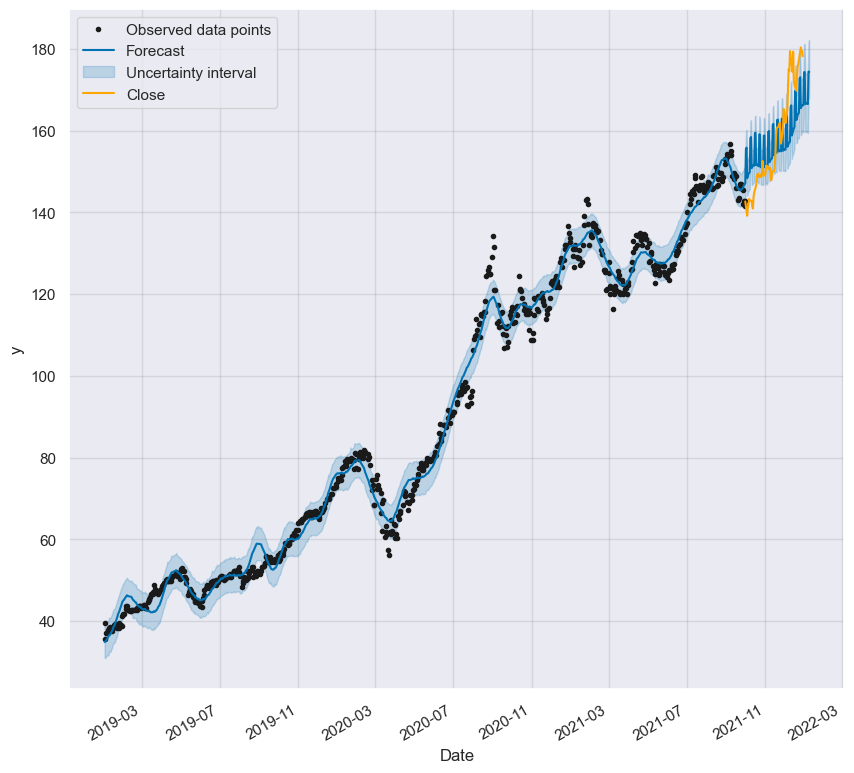

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 10))
fig1 = model.plot(forecast, ax=ax1)
df[["Close"]].loc[train_end_date:].plot(ax=ax1, color="orange")
plt.legend()

C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\AB2-PC\AppData\Local\pypoetry\Cache\virtualenvs\stock-analysis-59_ARg3a-py3.10\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of

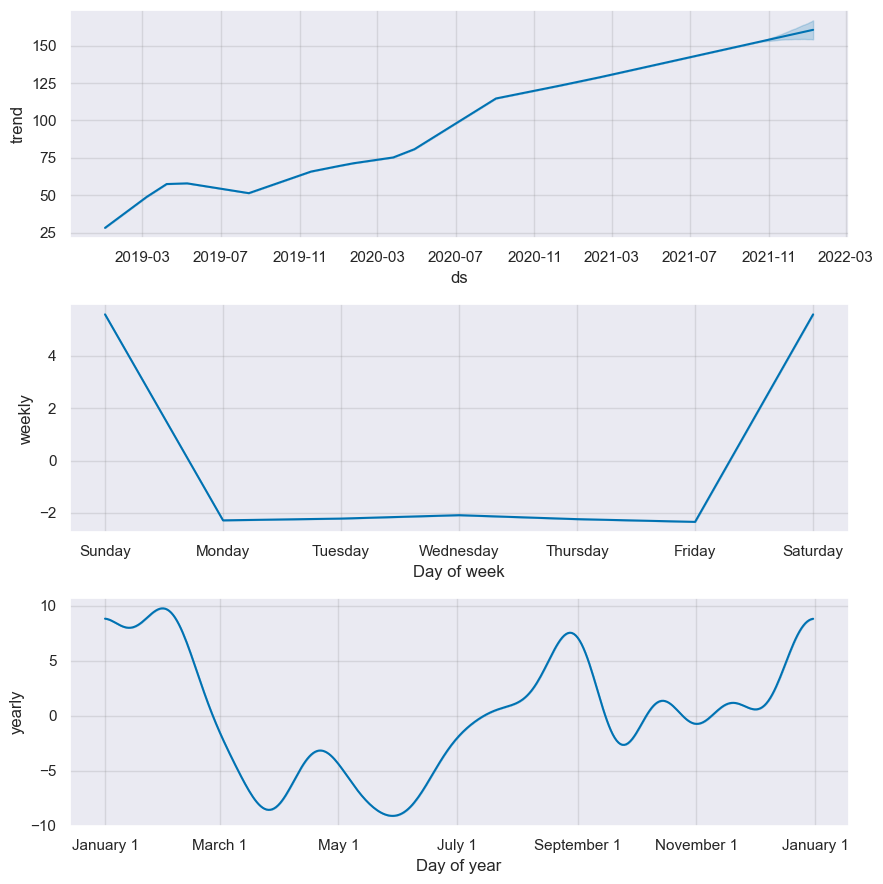

In [ ]:
fig2 = model.plot_components(forecast)